<a href="https://colab.research.google.com/github/cmwend1/Rate-and-HousePrice-TrendX/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [4]:
price=pd.read_csv("/content/drive/MyDrive/Average sale price.csv")

In [5]:
rate=pd.read_csv("/content/drive/MyDrive/30 yr Mortgage Rate.csv")

In [6]:

# Physical check the dataset info
price.info()
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  599 non-null    object
 1   ASPNHSUS          599 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  645 non-null    object 
 1   MORTGAGE30US      645 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [7]:
price.head()

,observation_date,ASPNHSUS
0,1/1/1975,39500
1,2/1/1975,40600
2,3/1/1975,42100
3,4/1/1975,42000
4,5/1/1975,43200


In [8]:
rate.head()

,observation_date,MORTGAGE30US
0,4/1/1971,7.31
1,5/1/1971,7.43
2,6/1/1971,7.53
3,7/1/1971,7.60
4,8/1/1971,7.70


In [9]:
#Rename columns
price.rename(columns={'observation_date':'Date','ASPNHSUS':'Price'}, inplace= True)
rate.rename(columns={'observation_date':'Date', 'MORTGAGE30US':'Rate'}, inplace=True)

In [10]:
#convert the Date column to datetime object
rate['Date']=pd.to_datetime(rate['Date'])
price['Date']=pd.to_datetime(price['Date'])

In [11]:

# Check for any missing number
price.isna().sum()

,0
Date,0
Price,0


In [12]:
rate.isna().sum()

,0
Date,0
Rate,0


In [13]:
#drop rows in the rate dataset that are before 1/1/1975 and after 11/1/2024
start_date=datetime(1975,1,1)
end_date=datetime(2024,11,1)
rate=rate[(rate['Date']>=start_date) & (rate['Date']<=end_date)]
price=price[(price['Date']>=start_date) & (price['Date']<=end_date)]

In [14]:
rate.head()

,Date,Rate
45,1975-01-01,9.43
46,1975-02-01,9.11
47,1975-03-01,8.90
48,1975-04-01,8.82
49,1975-05-01,8.91


In [15]:
#Merge the two datasets
df=pd.merge(price, rate, on='Date')
df

,Date,Price,Rate
0,1975-01-01,39500,9.43
1,1975-02-01,40600,9.11
2,1975-03-01,42100,8.90
3,1975-04-01,42000,8.82
4,1975-05-01,43200,8.91
...,...,...,...
594,2024-07-01,513200,6.85
595,2024-08-01,475600,6.50
596,2024-09-01,500800,6.18
597,2024-10-01,525400,6.43


In [16]:
df.to_csv('df.csv', index=False)

In [17]:
df.isnull().sum()

,0
Date,0
Price,0
Rate,0


In [18]:
# Define a function to identify outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

    # Detect outliers for 'Price' and 'Rate'
outliers_price = detect_outliers_iqr(df, 'Price')
outliers_rate = detect_outliers_iqr(df, 'Rate')

# Output the number of outliers and a preview
len(outliers_price), outliers_price.head(), len(outliers_rate), outliers_rate.head()

(0,
 Empty DataFrame
 Columns: [Date, Price, Rate]
 Index: [],
 14,
          Date  Price   Rate
 77 1981-06-01  84700  16.70
 78 1981-07-01  82600  16.83
 79 1981-08-01  87000  17.29
 80 1981-09-01  81300  18.16
 81 1981-10-01  82500  18.45)

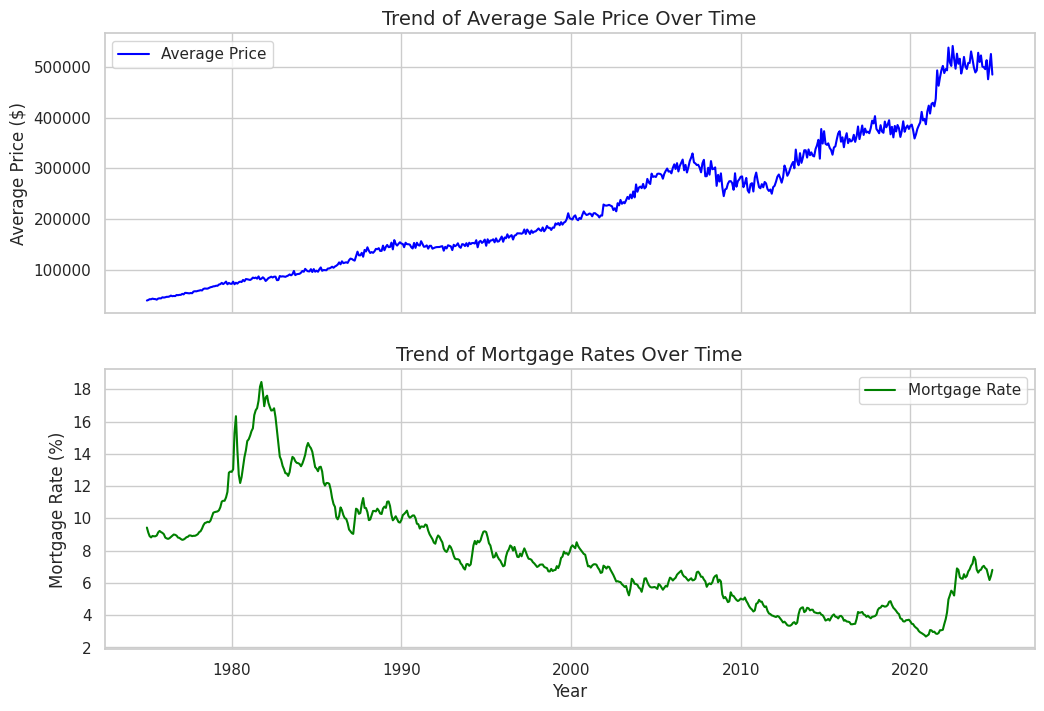

In [19]:
# Set plot style
sns.set(style="whitegrid")
# Create subplots for visualizations
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Price over time
ax[0].plot(df['Date'], df['Price'], label="Average Price", color='blue')
ax[0].set_title("Trend of Average Sale Price Over Time", fontsize=14)
ax[0].set_ylabel("Average Price ($)", fontsize=12)
ax[0].legend()

# Plot Rate over time
ax[1].plot(df['Date'], df['Rate'], label="Mortgage Rate", color='green')
ax[1].set_title("Trend of Mortgage Rates Over Time", fontsize=14)
ax[1].set_ylabel("Mortgage Rate (%)", fontsize=12)
ax[1].legend()

plt.xlabel("Year", fontsize=12)
plt.show()


In [20]:
# Calculate correlation between Price and Rate
correlation = df['Price'].corr(df['Rate'])
correlation


-0.7492760884400396

In [ ]:
#The correlation coefficient between the average sale price and mortgage rates is -0.75, indicating a strong negative correlation.


In [21]:
#Set Date as index
df.set_index('Date', inplace=True)


In [22]:
# Time Series Decomposition
price_decomposition = seasonal_decompose(df['Price'], model='additive', period=12)
rate_decomposition = seasonal_decompose(df['Rate'], model='additive', period=12)


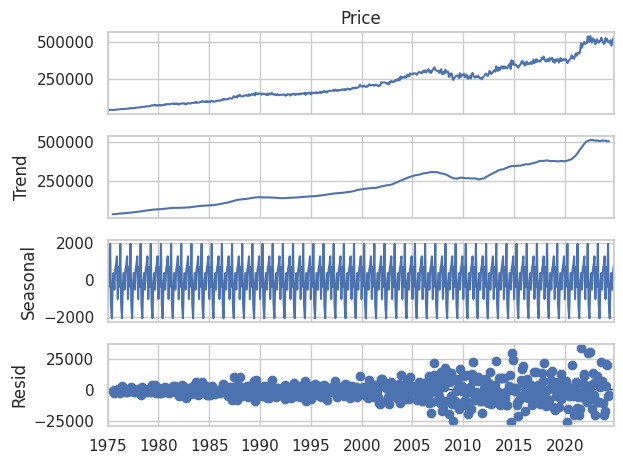

In [23]:
# Plot decomposition for Prices
price_decomposition.plot()
plt.show()

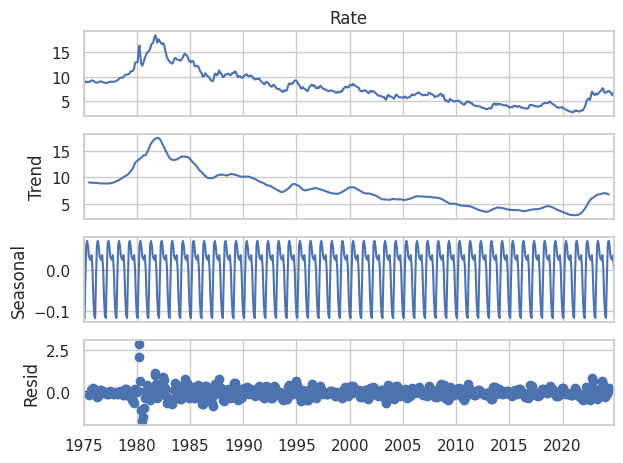

In [24]:
# Plot decomposition for Rates
rate_decomposition.plot()
plt.show()

In [25]:
#Check Price Sesonality
#Extract Seasonal Component
seasonal_component = price_decomposition.seasonal

In [26]:
# Add Data information to seasonal_component
seasonal_df = pd.DataFrame({
    'Seasonal': seasonal_component,
    'Month': seasonal_component.index.month,  # Extract month
    'Year': seasonal_component.index.year     # Extract year
})

In [27]:
# Group by Month to Analyze Recurring Patterns
monthly_seasonal_avg = seasonal_df.groupby('Month')['Seasonal'].mean()


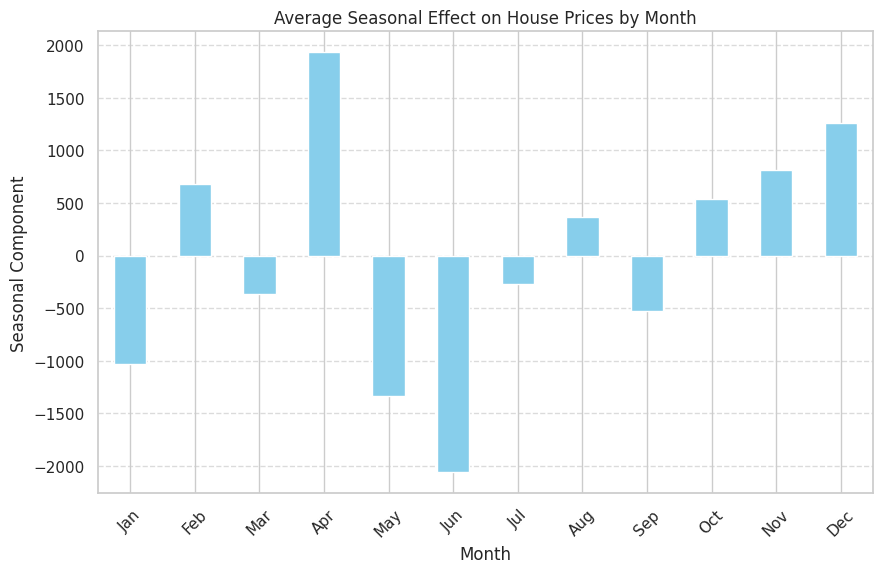

In [28]:
# Plot Seasonal Patterns
plt.figure(figsize=(10, 6))
monthly_seasonal_avg.plot(kind='bar', color='skyblue')
plt.title('Average Seasonal Effect on House Prices by Month')
plt.xlabel('Month')
plt.ylabel('Seasonal Component')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()